In [1]:
#https://ledatascientist.com/support-vector-machines-svm-en-python/
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

frame = pd.read_excel("DonneesChiots72Col.xlsx")
frame

,ID,IDPortee,TaillePortee,Sexe,Mort,Diarrhee,AgeDiarrhee1,AgeDiarrhee2,Hospitalisation,PoidsJ21,...,picT5,picT6,picT7,picT8,picTped,diarr4,diarr5,diarr6,diarr7,diarr8
0,L2A,2,5,M,1,1,28.0,NaN,1,844,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0
1,L2B,2,5,F,0,1,29.0,NaN,0,542,...,0.0,0.0,0.0,1.0,1.0,0,1,0,0,0
2,L2C,2,5,M,0,0,NaN,NaN,0,653,...,0.0,0.0,0.0,1.0,1.0,0,0,0,0,0
3,L2D,2,5,F,0,1,54.0,NaN,1,666,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
4,L2E,2,5,F,0,1,52.0,NaN,1,604,...,0.0,0.0,0.0,1.0,1.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,L54A,54,8,M,0,0,NaN,NaN,0,976,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
163,L54C,54,8,F,0,0,NaN,NaN,0,977,...,0.0,1.0,0.0,0.0,1.0,0,0,0,0,0
164,L54G,54,8,M,0,0,NaN,NaN,0,908,...,0.0,0.0,1.0,0.0,1.0,0,0,0,0,0
165,L55F,55,7,M,0,0,NaN,NaN,0,802,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


In [2]:
frame.dtypes

ID              object
IDPortee         int64
TaillePortee     int64
Sexe            object
Mort             int64
                 ...  
diarr4           int64
diarr5           int64
diarr6           int64
diarr7           int64
diarr8           int64
Length: 73, dtype: object

In [3]:
#Redéfinition des bons types 

frame["Sexe"]=pd.Categorical(frame["Sexe"], ordered=False)
frame["Mort"]=pd.Categorical(frame["Mort"], ordered=False)
frame["Diarrhee"]=pd.Categorical(frame["Diarrhee"], ordered=False)
frame["Hospitalisation"]=pd.Categorical(frame["Hospitalisation"], ordered=False)


In [4]:
frame.dtypes

ID                object
IDPortee           int64
TaillePortee       int64
Sexe            category
Mort            category
                  ...   
diarr4             int64
diarr5             int64
diarr6             int64
diarr7             int64
diarr8             int64
Length: 73, dtype: object

In [5]:
frame.describe()

,IDPortee,TaillePortee,AgeDiarrhee1,AgeDiarrhee2,PoidsJ21,PoidsJ28,PoidsJ35,PoidsJ42,PoidsJ49,PoidsJ56,...,picT5,picT6,picT7,picT8,picTped,diarr4,diarr5,diarr6,diarr7,diarr8
count,167.000000,167.000000,63.000000,9.000000,167.000000,167.000000,167.000000,167.000000,165.000000,144.000000,...,164.00000,155.000000,158.000000,132.000000,130.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,24.347305,5.664671,46.492063,50.888889,983.323353,1343.712575,1758.029940,2075.568862,2376.769697,2600.708333,...,0.02439,0.064516,0.145570,0.363636,0.569231,0.017964,0.017964,0.071856,0.083832,0.221557
std,16.325355,1.959256,8.866161,6.753600,393.440941,582.422414,814.051014,915.202772,1020.060266,1183.091038,...,0.15473,0.246466,0.353796,0.482878,0.497100,0.133220,0.133220,0.259026,0.277970,0.416543
min,2.000000,1.000000,27.000000,35.000000,262.000000,355.000000,551.000000,610.000000,780.000000,940.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,4.000000,40.000000,50.000000,712.500000,930.000000,1160.000000,1380.000000,1620.000000,1657.500000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.000000,6.000000,49.000000,52.000000,904.000000,1220.000000,1550.000000,1850.000000,2140.000000,2180.000000,...,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,39.500000,7.000000,53.000000,56.000000,1209.500000,1615.000000,2240.000000,2555.000000,2970.000000,3276.250000,...,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,55.000000,9.000000,59.000000,56.000000,2060.000000,2920.000000,4090.000000,4620.000000,5390.000000,5650.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Grâce à cette analyse, on voit que 63 chiots ont été atteints de diarrhée une fois et 9 deux fois. 

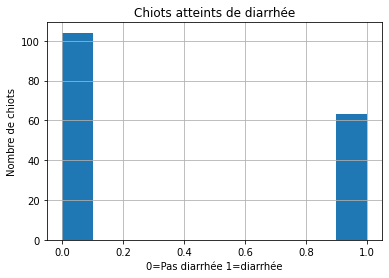

In [6]:
import matplotlib.pyplot as plt

frame["Diarrhee"].hist()
plt.title('Chiots atteints de diarrhée')
plt.xlabel('0=Pas diarrhée 1=diarrhée')
plt.ylabel('Nombre de chiots')
plt.show()

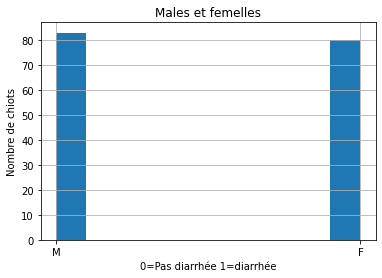

In [7]:
frame["Sexe"].hist()
plt.title('Males et femelles')
plt.xlabel('0=Pas diarrhée 1=diarrhée')
plt.ylabel('Nombre de chiots')
plt.show()

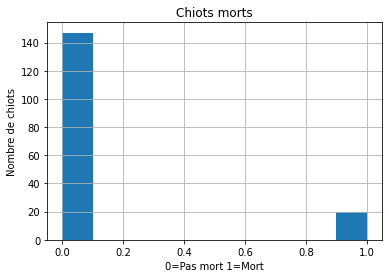

In [44]:
frame["Mort"].hist()
plt.title('Chiots morts')
plt.xlabel('0=Pas mort 1=Mort')
plt.ylabel('Nombre de chiots')
plt.show()

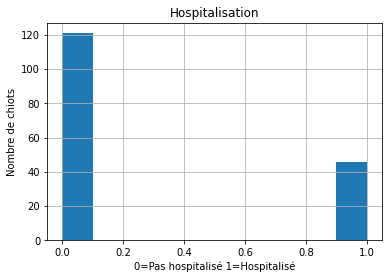

In [9]:
frame["Hospitalisation"].hist()
plt.title('Hospitalisation')
plt.xlabel('0=Pas hospitalisé 1=Hospitalisé')
plt.ylabel('Nombre de chiots')
plt.show()

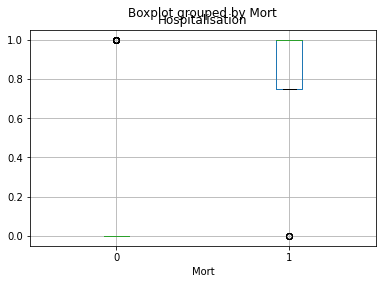

In [10]:
frame.boxplot(column="Hospitalisation",by="Mort")
plt.show()

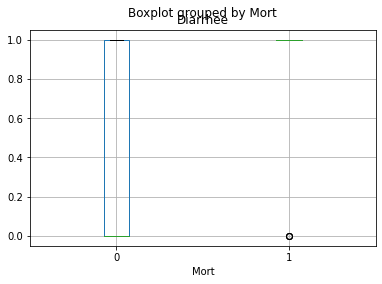

In [11]:
frame.boxplot(column="Diarrhee",by="Mort")
plt.show()

# Corrélation

In [12]:
#skiprows supprime la premiere ligne où il est écrit " sex cp trestbps chol thalach"
frame2 = pd.read_excel("DonneesChiotsTriees.xlsx", skiprows=1, header=None, nrows=200, usecols=[2,3,4,5,8,9,15,51], names=["TaillePortee", "Sexe", "Mort", "Diarrhee", "Hospitalisation", "PoidsJ21","TRD21", "ExcreParvoJ28"])
#Afficher les 5 premières lignes
frame2.head() 

,TaillePortee,Sexe,Mort,Diarrhee,Hospitalisation,PoidsJ21,TRD21,ExcreParvoJ28
0,5,M,1,1,1,844,"37,5",0.0
1,5,F,0,1,0,542,"37,4",0.0
2,5,M,0,0,0,653,"37,3",0.0
3,5,F,0,1,1,666,"37,3",0.0
4,5,F,0,1,1,604,"37,4",0.0


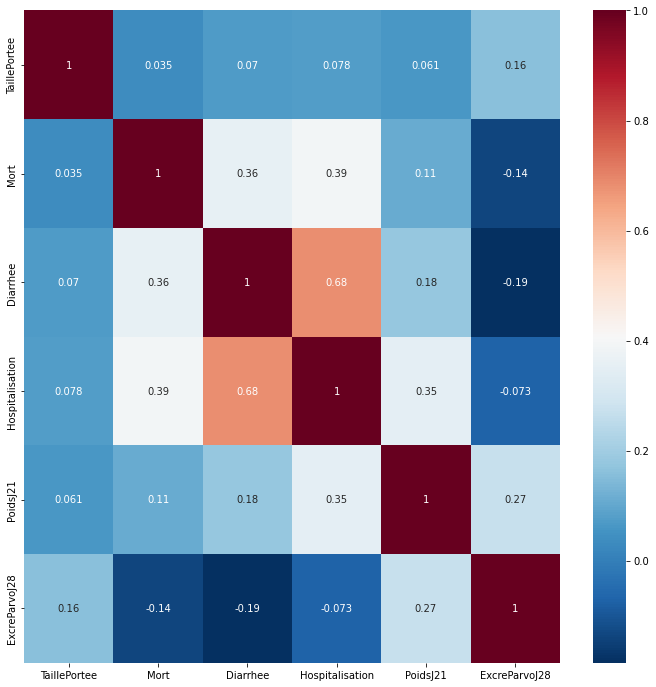

In [13]:
from sklearn.feature_selection import SelectKBest

import seaborn as sns

plt.figure(figsize=(12,12))
cor = frame2.corr()
sns.heatmap(cor, annot=True, cmap='RdBu_r')
plt.show()

Grâce à ce graphe, on peut voir des corrélations entre :

    - hospitalisation et diarrhée (0.68)
    - hospitalisation et mort (0.39)
    - mort et diarrhée (0.36)

In [14]:
#skiprows supprime la premiere ligne où il est écrit " sex cp trestbps chol thalach"
frame3 = pd.read_excel("DonneesChiotsTriees.xlsx", skiprows=1, header=None, nrows=200, usecols=[56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72], names=["PicParvo4", "PicParvo5", "PicParvo6", "PicParvo7", "PicParvo8", "PicParvoPediatrique","PicTemp4", "PicTemp5", "PicTemp6", "PicTemp7", "PicTemp8","PicTempPediatrique", "Diarrh4", "Diarrh5", "Diarrh6", "Diarrh7","Diarrh8"])
#Afficher les 5 premières lignes
frame3.head() 

C:\tools\miniconda3\lib\site-packages\pandas\io\excel\_base.py:1272: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  return self._reader.parse(
C:\tools\miniconda3\lib\site-packages\pandas\io\excel\_base.py:1272: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return self._reader.parse(


,PicParvo4,PicParvo5,PicParvo6,PicParvo7,PicParvo8,PicParvoPediatrique,PicTemp4,PicTemp5,PicTemp6,PicTemp7,PicTemp8,PicTempPediatrique,Diarrh4,Diarrh5,Diarrh6,Diarrh7,Diarrh8


In [15]:
"""plt.figure(figsize=(12,12))
cor = frame3.corr()
sns.heatmap(cor, annot=True, cmap='RdBu_r')
plt.show()"""

"plt.figure(figsize=(12,12))\ncor = frame3.corr()\nsns.heatmap(cor, annot=True, cmap='RdBu_r')\nplt.show()"

A l'aide de cette matrice, on voit des corrélations entre : 

    - PicTemp semaine 6 et Pic Parvo semaine 6
    - Pic température pendant la période pédiatrique et pic de température à la 8ème semaine 

# Support Vector Machine (SVM)

La méthode SVM se base sur deux idées : 

        - La maximisation de la marge, c'est-à-dire la distance entre la frontière de décision et et les observations les plus proches "vecteurs de supports"
        
        - Le choix d'un hyperplan séparateur dans un nouvel espace de combinaisons non-linéaires entre les variables, dans lequel une séparation linéaire des individus est possible. 
        

In [16]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [17]:
#DataFrame avec seulement les données de températures et de mort - hospitalisation - diarrhée

df = pd.read_excel("donneesChiotsTemperatureDiarrhee.xlsx")

In [18]:
df

,ID,Mort,Diarrhee,Hospitalisation,TRD21,TRD22,TRD23,TRD24,TRD25,TRD26,...,TRD47,TRD48,TRD49,TRD50,TRD51,TRD52,TRD53,TRD54,TRD55,TRD56
0,L2A,1,1,1,37.5,37.5,37.5,37.8,37.7,37.8,...,38.4,38.4,38.2,38.4,38.9,38.7,38.5,38.7,39.0,NaN
1,L2B,0,1,0,37.4,37.8,37.3,37.8,37.8,37.6,...,38.2,38.4,37.4,37.8,39.1,38.1,38.7,37.7,37.9,38.3
2,L2C,0,0,0,37.3,37.5,37.6,37.5,37.4,37.5,...,38.5,38.2,38.4,38.1,38.8,39.1,37.4,38.0,38.2,37.6
3,L2D,0,1,1,37.3,37.8,36.9,37.9,37.5,37.7,...,37.8,38.4,38.4,38.4,38.9,38.3,38.5,38.6,38.0,NaN
4,L2E,0,1,1,37.4,37.5,37.1,37.7,37.4,37.2,...,38.3,38.3,38.7,38.6,39.1,37.4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,L54A,0,0,0,37.8,37.6,37.3,37.5,38.4,37.9,...,38.3,37.9,38.3,38.8,38.7,38.9,38.5,37.8,38.5,38.4
163,L54C,0,0,0,37.2,NaN,37.1,37.8,37.7,37.8,...,38.8,38.8,37.9,38.1,38.4,38.9,38.2,38.9,38.5,38.1
164,L54G,0,0,0,37.4,37.5,37.2,37.7,37.5,37.6,...,38.7,38.4,36.8,38.1,38.2,38.9,38.8,38.6,38.2,38.3
165,L55F,0,0,0,37.2,37.1,37.4,37.4,37.5,37.9,...,38.5,38.0,38.3,38.4,38.5,38.4,38.4,38.9,38.9,38.1


#### On va remplacer les valeurs Nan grâce à une imputation par la moyenne 

In [19]:
df_clean = df.copy()

del df_clean['ID']

In [20]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

imp_mean = imp_mean.fit(df_clean)

#On stocke les colonnes dans une variable pour qu'elles deviennent une liste
column = df_clean.columns

df_clean = imp_mean.transform(df_clean)

#On convertit df3 en dataFrame
df_clean = pd.DataFrame(df_clean, columns=column)

df_clean

,Mort,Diarrhee,Hospitalisation,TRD21,TRD22,TRD23,TRD24,TRD25,TRD26,TRD27,...,TRD47,TRD48,TRD49,TRD50,TRD51,TRD52,TRD53,TRD54,TRD55,TRD56
0,1.0,1.0,1.0,37.5,37.500000,37.5,37.8,37.7,37.8,37.3,...,38.4,38.4,38.2,38.4,38.9,38.7,38.500000,38.700000,39.000000,38.444444
1,0.0,1.0,0.0,37.4,37.800000,37.3,37.8,37.8,37.6,37.3,...,38.2,38.4,37.4,37.8,39.1,38.1,38.700000,37.700000,37.900000,38.300000
2,0.0,0.0,0.0,37.3,37.500000,37.6,37.5,37.4,37.5,37.7,...,38.5,38.2,38.4,38.1,38.8,39.1,37.400000,38.000000,38.200000,37.600000
3,0.0,1.0,1.0,37.3,37.800000,36.9,37.9,37.5,37.7,37.7,...,37.8,38.4,38.4,38.4,38.9,38.3,38.500000,38.600000,38.000000,38.444444
4,0.0,1.0,1.0,37.4,37.500000,37.1,37.7,37.4,37.2,37.7,...,38.3,38.3,38.7,38.6,39.1,37.4,38.405263,38.316667,38.379508,38.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,0.0,0.0,0.0,37.8,37.600000,37.3,37.5,38.4,37.9,37.9,...,38.3,37.9,38.3,38.8,38.7,38.9,38.500000,37.800000,38.500000,38.400000
163,0.0,0.0,0.0,37.2,37.452121,37.1,37.8,37.7,37.8,37.9,...,38.8,38.8,37.9,38.1,38.4,38.9,38.200000,38.900000,38.500000,38.100000
164,0.0,0.0,0.0,37.4,37.500000,37.2,37.7,37.5,37.6,37.7,...,38.7,38.4,36.8,38.1,38.2,38.9,38.800000,38.600000,38.200000,38.300000
165,0.0,0.0,0.0,37.2,37.100000,37.4,37.4,37.5,37.9,37.7,...,38.5,38.0,38.3,38.4,38.5,38.4,38.400000,38.900000,38.900000,38.100000


In [61]:
print(df.keys())

Index(['ID', 'Mort', 'Diarrhee', 'Hospitalisation', 'TRD21', 'TRD22', 'TRD23',
       'TRD24', 'TRD25', 'TRD26', 'TRD27', 'TRD28', 'TRD29', 'TRD30', 'TRD31',
       'TRD32', 'TRD33', 'TRD34', 'TRD35', 'TRD36', 'TRD37', 'TRD38', 'TRD39',
       'TRD40', 'TRD41', 'TRD42', 'TRD43', 'TRD44', 'TRD45', 'TRD46', 'TRD47',
       'TRD48', 'TRD49', 'TRD50', 'TRD51', 'TRD52', 'TRD53', 'TRD54', 'TRD55',
       'TRD56'],
      dtype='object')


In [21]:
#On va créer notre dataframe avec les données tests et les données entraînées 

# on garde toutes les colonnes de la température  
x = df_clean.iloc[:, 5:40].values
print (df_clean.iloc[:,5:40])
# pour le y diarrhée ou pas 
y = df_clean.iloc[:,1].values
print(df_clean.iloc[:,1])

     TRD23  TRD24  TRD25  TRD26  TRD27  TRD28  TRD29  TRD30  TRD31  TRD32  \
0     37.5   37.8   37.7   37.8   37.3   37.9   37.5   37.7   37.8   38.3   
1     37.3   37.8   37.8   37.6   37.3   37.3   37.7   37.5   37.3   37.6   
2     37.6   37.5   37.4   37.5   37.7   37.7   37.6   37.8   37.8   37.8   
3     36.9   37.9   37.5   37.7   37.7   37.7   37.8   37.8   37.8   37.9   
4     37.1   37.7   37.4   37.2   37.7   37.6   37.8   37.7   37.7   37.4   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
162   37.3   37.5   38.4   37.9   37.9   37.1   37.8   37.8   37.7   38.0   
163   37.1   37.8   37.7   37.8   37.9   37.2   37.4   37.9   37.8   37.9   
164   37.2   37.7   37.5   37.6   37.7   36.8   37.8   38.0   37.9   37.8   
165   37.4   37.4   37.5   37.9   37.7   37.4   37.9   37.8   37.9   38.1   
166   37.3   37.5   37.5   37.7   37.6   37.4   37.8   37.6   37.7   38.0   

     ...  TRD47  TRD48  TRD49  TRD50  TRD51  TRD52      TRD53      TRD54  \

In [22]:
df_clean.describe()

,Mort,Diarrhee,Hospitalisation,TRD21,TRD22,TRD23,TRD24,TRD25,TRD26,TRD27,...,TRD47,TRD48,TRD49,TRD50,TRD51,TRD52,TRD53,TRD54,TRD55,TRD56
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,...,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,0.119760,0.377246,0.275449,37.247590,37.452121,37.462424,37.653892,37.699401,37.701227,37.767470,...,38.266049,38.227439,38.256970,38.382424,38.356442,38.449351,38.405263,38.316667,38.379508,38.444444
std,0.325658,0.486155,0.448084,0.341454,0.292185,0.325678,0.324826,0.323106,0.278115,0.357908,...,0.395024,0.382340,0.419154,0.384167,0.456286,0.462607,0.518662,0.432479,0.454421,0.455709
min,0.000000,0.000000,0.000000,36.100000,36.600000,36.500000,36.700000,36.800000,36.700000,36.600000,...,37.200000,37.100000,36.800000,37.200000,37.200000,36.500000,34.800000,35.900000,36.800000,37.200000
25%,0.000000,0.000000,0.000000,37.050000,37.300000,37.300000,37.400000,37.550000,37.500000,37.600000,...,38.000000,38.000000,38.000000,38.100000,38.100000,38.200000,38.200000,38.100000,38.200000,38.200000
50%,0.000000,0.000000,0.000000,37.300000,37.500000,37.500000,37.700000,37.700000,37.700000,37.800000,...,38.300000,38.200000,38.256970,38.400000,38.356442,38.500000,38.400000,38.316667,38.379508,38.444444
75%,0.000000,1.000000,1.000000,37.400000,37.600000,37.700000,37.900000,37.900000,37.800000,38.000000,...,38.500000,38.400000,38.500000,38.600000,38.600000,38.700000,38.650000,38.500000,38.500000,38.650000
max,1.000000,1.000000,1.000000,38.500000,38.800000,38.500000,38.800000,39.900000,38.500000,39.700000,...,40.000000,39.600000,39.600000,40.100000,40.200000,39.900000,39.800000,39.700000,40.200000,40.400000


On prend 25% de données tests et 75% de données d'entrainement

In [23]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state= 0)

In [24]:
#model_SVM = svm.SVC(kernel='linear', C= 1, gamma=1) 
model_SVM = svm.SVC() 
model_SVM.fit(x_train, y_train)
model_SVM.score(x_train, y_train)
y_predic_train_SVM= model_SVM.predict(x_train)
y_predic_SVM= model_SVM.predict(x_test)

In [25]:
print('Classification Report for SVM ', classification_report(y_train, y_predic_train_SVM))
print('Classification Report for SVM ', classification_report(y_test, y_predic_SVM))

Classification Report for SVM                precision    recall  f1-score   support

         0.0       0.78      1.00      0.88        76
         1.0       1.00      0.57      0.73        49

    accuracy                           0.83       125
   macro avg       0.89      0.79      0.80       125
weighted avg       0.87      0.83      0.82       125

Classification Report for SVM                precision    recall  f1-score   support

         0.0       0.72      0.93      0.81        28
         1.0       0.67      0.29      0.40        14

    accuracy                           0.71        42
   macro avg       0.69      0.61      0.61        42
weighted avg       0.70      0.71      0.68        42



In [42]:
model_SVM = svm.SVC(kernel='linear', C= 1, gamma=1).fit(x_train, y_train)
model_SVM.score(x_train, y_train)
y_predic_train_SVM= model_SVM.predict(x_train)
y_predic_SVM= model_SVM.predict(x_test)

In [43]:
print('Classification Report for SVM ', classification_report(y_train, y_predic_train_SVM))
print('Classification Report for SVM ', classification_report(y_test, y_predic_SVM))

Classification Report for SVM                precision    recall  f1-score   support

         0.0       0.74      0.86      0.79        76
         1.0       0.70      0.53      0.60        49

    accuracy                           0.73       125
   macro avg       0.72      0.69      0.70       125
weighted avg       0.72      0.73      0.72       125

Classification Report for SVM                precision    recall  f1-score   support

         0.0       0.70      0.57      0.63        28
         1.0       0.37      0.50      0.42        14

    accuracy                           0.55        42
   macro avg       0.53      0.54      0.53        42
weighted avg       0.59      0.55      0.56        42



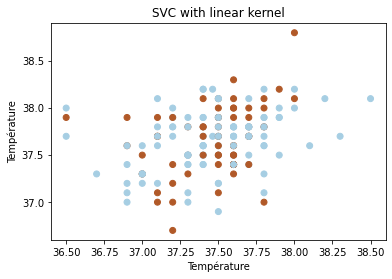

In [60]:

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Température')
plt.ylabel('Température')
plt.title('SVC with linear kernel')
plt.show()

In [28]:
model_SVM = svm.SVC(kernel='poly', C= 1, gamma=1) 
model_SVM.fit(x_train, y_train)
model_SVM.score(x_train, y_train)
y_predic_train_SVM= model_SVM.predict(x_train)
y_predic_SVM= model_SVM.predict(x_test)
print('Classification Report for SVM ', classification_report(y_train, y_predic_train_SVM))
print('Classification Report for SVM ', classification_report(y_test, y_predic_SVM))

Classification Report for SVM                precision    recall  f1-score   support

         0.0       0.76      0.72      0.74        76
         1.0       0.60      0.65      0.63        49

    accuracy                           0.70       125
   macro avg       0.68      0.69      0.69       125
weighted avg       0.70      0.70      0.70       125

Classification Report for SVM                precision    recall  f1-score   support

         0.0       0.70      0.57      0.63        28
         1.0       0.37      0.50      0.42        14

    accuracy                           0.55        42
   macro avg       0.53      0.54      0.53        42
weighted avg       0.59      0.55      0.56        42



In [32]:
model_SVM = svm.SVC(kernel='rbf', C= 1, gamma=10) 
model_SVM.fit(x_train, y_train)
model_SVM.score(x_train, y_train)
y_predic_train_SVM= model_SVM.predict(x_train)
y_predic_SVM= model_SVM.predict(x_test)
print('Classification Report for SVM ', classification_report(y_train, y_predic_train_SVM))
print('Classification Report for SVM ', classification_report(y_test, y_predic_SVM))

Classification Report for SVM                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        76
         1.0       1.00      1.00      1.00        49

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125

Classification Report for SVM                precision    recall  f1-score   support

         0.0       0.67      1.00      0.80        28
         1.0       0.00      0.00      0.00        14

    accuracy                           0.67        42
   macro avg       0.33      0.50      0.40        42
weighted avg       0.44      0.67      0.53        42



C:\tools\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\tools\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\tools\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
